In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt

In [2]:
#pip install nsepy
#pip install statsmodels

In [3]:
start = dt.datetime(2021,7,1)
end = dt.datetime(2022,1,28)
# stk_data = gh(symbol = 'TATACOFFEE', start=start, end=end)
stk_data = pd.read_csv("Tatacoffee13_21.csv", index_col='Date')

In [4]:
# stk_data = stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [5]:
column = "Close"

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1=Ms.fit_transform(stk_data[[column]])
print("len:",data1.shape)

len: (2225, 1)


In [7]:
training_size = round(len(data1)*0.8)
print("training_size-",training_size)
x_train = data1[:training_size]
x_test = data1[training_size:]
print("x_train-",x_train.shape)
print("x_test-",x_test.shape)
y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train-",y_train.shape)
print("y_test-",y_test.shape)

training_size- 1780
x_train- (1780, 1)
x_test- (445, 1)
y_train- (1780, 1)
y_test- (445, 1)


In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
trends = ['n','t','c','ct']
lags = [1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg

for i in lags:
    for td in trends:
        #print(td)
        model = AutoReg(x_train,lags=i,trend=td)
        model_fit = model.fit()
        y_pred = model_fit.predict(len(x_train),len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
#         from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("RMSE:", rmse)
        
        mape = mean_absolute_percentage_error(y_test, y_pred)
        print("MAPE:", mape)
        print("***********")

Lag=1,Trend=n
RMSE: 0.058859347313836866
MAPE: 108221610722.61273
***********
Lag=1,Trend=t
RMSE: 0.06567306536707392
MAPE: 105694109653.11528
***********
Lag=1,Trend=c
RMSE: 0.04336525033763366
MAPE: 114804919729.45547
***********
Lag=1,Trend=ct
RMSE: 0.15273694386322909
MAPE: 74699776526.65353
***********
Lag=2,Trend=n
RMSE: 0.05946957243778428
MAPE: 107811149748.47528
***********
Lag=2,Trend=t
RMSE: 0.053333877982384155
MAPE: 110268940666.53214
***********
Lag=2,Trend=c
RMSE: 0.03487154364943177
MAPE: 119368707397.77913
***********
Lag=2,Trend=ct
RMSE: 0.15147077869434547
MAPE: 72770748055.74287
***********
Lag=3,Trend=n
RMSE: 0.05944295500377151
MAPE: 108331645493.58449
***********
Lag=3,Trend=t
RMSE: 0.053497989920498146
MAPE: 110722667896.76085
***********
Lag=3,Trend=c
RMSE: 0.03603799252421895
MAPE: 119319866515.35008
***********
Lag=3,Trend=ct
RMSE: 0.14723515340668172
MAPE: 75055822469.65422
***********
Lag=4,Trend=n
RMSE: 0.05930752124236647
MAPE: 108606221832.28146
********

In [9]:
len(y_pred)

445

In [10]:
i=2
td='c'
model = AutoReg(x_train,lags=i,trend=td)
model_fit = model.fit()
y_pred = model_fit.predict(len(x_train),len(data1)-1)
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test,y_pred)
print("Lag={},Trend={}".format(i,td))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

Lag=2,Trend=c
RMSE: 0.03487154364943177
MAPE: 119368707397.77913


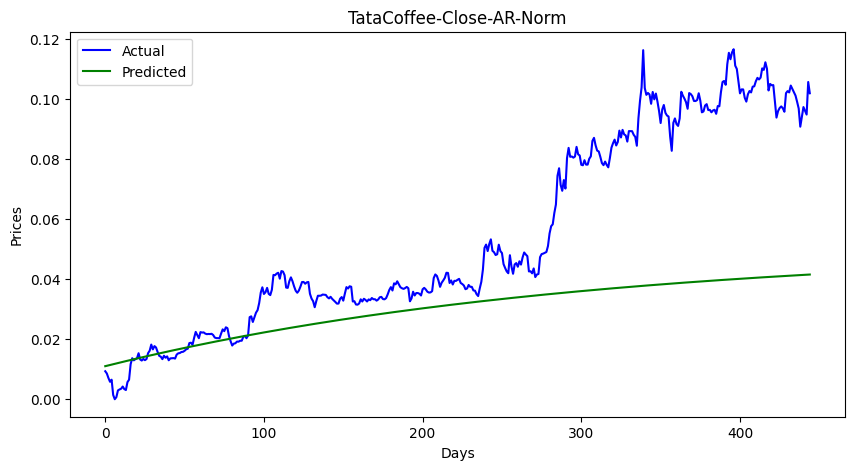

In [11]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [12]:
y_test

array([[0.00931949],
       [0.00856893],
       [0.0070678 ],
       [0.00581686],
       [0.00650488],
       [0.00140731],
       [0.        ],
       [0.00068802],
       [0.0029397 ],
       [0.00325244],
       [0.00350263],
       [0.00422192],
       [0.00337753],
       [0.0030648 ],
       [0.00569177],
       [0.00650488],
       [0.01169627],
       [0.0136665 ],
       [0.01294721],
       [0.01335377],
       [0.01363523],
       [0.01532399],
       [0.01322867],
       [0.01288466],
       [0.01341631],
       [0.01300976],
       [0.01338504],
       [0.01535527],
       [0.01616838],
       [0.01820115],
       [0.0166062 ],
       [0.01770078],
       [0.01723167],
       [0.01573055],
       [0.01444834],
       [0.01416688],
       [0.01335377],
       [0.01447961],
       [0.01382287],
       [0.0142607 ],
       [0.01297848],
       [0.01360395],
       [0.01363523],
       [0.01369777],
       [0.01354141],
       [0.01485489],
       [0.01529272],
       [0.015

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
aTestNormTable

,Close
0,0.009319
1,0.008569
2,0.007068
3,0.005817
4,0.006505
...,...
440,0.097323
441,0.096041
442,0.094821
443,0.105673


In [14]:
actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[ 64.3 ],
       [ 63.1 ],
       [ 60.7 ],
       [ 58.7 ],
       [ 59.8 ],
       [ 51.65],
       [ 49.4 ],
       [ 50.5 ],
       [ 54.1 ],
       [ 54.6 ],
       [ 55.  ],
       [ 56.15],
       [ 54.8 ],
       [ 54.3 ],
       [ 58.5 ],
       [ 59.8 ],
       [ 68.1 ],
       [ 71.25],
       [ 70.1 ],
       [ 70.75],
       [ 71.2 ],
       [ 73.9 ],
       [ 70.55],
       [ 70.  ],
       [ 70.85],
       [ 70.2 ],
       [ 70.8 ],
       [ 73.95],
       [ 75.25],
       [ 78.5 ],
       [ 75.95],
       [ 77.7 ],
       [ 76.95],
       [ 74.55],
       [ 72.5 ],
       [ 72.05],
       [ 70.75],
       [ 72.55],
       [ 71.5 ],
       [ 72.2 ],
       [ 70.15],
       [ 71.15],
       [ 71.2 ],
       [ 71.3 ],
       [ 71.05],
       [ 73.15],
       [ 73.85],
       [ 74.  ],
       [ 74.55],
       [ 74.65],
       [ 75.2 ],
       [ 76.  ],
       [ 76.3 ],
       [ 79.3 ],
       [ 79.5 ],
       [ 78.35],
       [ 82.05],
       [ 85.25],
       [ 83.55

In [15]:
actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,64.3
1,63.1
2,60.7
3,58.7
4,59.8
...,...
440,205.0
441,202.95
442,201.0
443,218.35


In [16]:
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori,[column])

In [17]:
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriA = conversionSingle(predicted_stock_price_test_ori,[column])

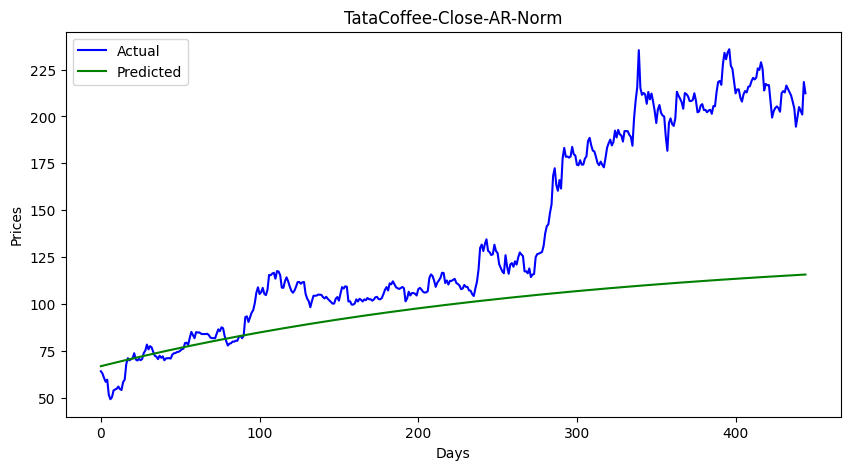

In [18]:
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriA,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")